In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_qa = pd.read_csv('data/wine-qa.csv')
wine_qa.head()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,type,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,red,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,5,2.6,0.68,67.0,red,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,5,2.3,0.65,54.0,red,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,6,1.9,0.58,60.0,red,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,5,1.9,0.56,34.0,red,0.70


In [3]:
wine_qa.describe()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,0.056034,0.318633,0.994697,7.215307,30.525319,3.218501,5.818378,5.443235,0.531268,115.744574,0.339666
std,1.192712,0.035034,0.145318,0.002999,1.296434,17.749400,0.160787,0.873255,4.757804,0.148806,56.521855,0.164636
min,8.000000,0.009000,0.000000,0.987110,3.800000,1.000000,2.720000,3.000000,0.600000,0.220000,6.000000,0.080000
25%,9.500000,0.038000,0.250000,0.992340,6.400000,17.000000,3.110000,5.000000,1.800000,0.430000,77.000000,0.230000
50%,10.300000,0.047000,0.310000,0.994890,7.000000,29.000000,3.210000,6.000000,3.000000,0.510000,118.000000,0.290000
75%,11.300000,0.065000,0.390000,0.996990,7.700000,41.000000,3.320000,6.000000,8.100000,0.600000,156.000000,0.400000
max,14.900000,0.611000,1.660000,1.038980,15.900000,289.000000,4.010000,9.000000,65.800000,2.000000,440.000000,1.580000


In [4]:
y = wine_qa['quality']
X = wine_qa.drop(columns=['quality'])

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [6]:
label_encoder.fit(X['type'])

LabelEncoder()

In [7]:
color = label_encoder.transform(X['type'])
X = X.drop(columns=['type'])

In [8]:
from sklearn.preprocessing import StandardScaler
prep = StandardScaler()
prep.fit(X)

StandardScaler()

In [9]:
X_trans = pd.DataFrame(prep.transform(X))
X_trans['type'] = color
X_trans.head()

,0,1,2,3,4,5,6,7,8,9,10,type
0,-0.915464,0.569958,-2.192833,1.034993,0.142473,-1.100140,1.813090,-0.744778,0.193097,-1.446359,2.188833,0
1,-0.580068,1.197975,-2.192833,0.701486,0.451036,-0.311320,-0.115073,-0.597640,0.999579,-0.862469,3.282235,0
2,-0.580068,1.026697,-1.917553,0.768188,0.451036,-0.874763,0.258120,-0.660699,0.797958,-1.092486,2.553300,0
3,-0.580068,0.541412,1.661085,1.101694,3.073817,-0.762074,-0.363868,-0.744778,0.327510,-0.986324,-0.362438,0
4,-0.915464,0.569958,-2.192833,1.034993,0.142473,-1.100140,1.813090,-0.744778,0.193097,-1.446359,2.188833,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans,y)

In [11]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,type
580,-0.747766,0.941059,1.179346,1.835408,3.922363,-1.438205,-0.177272,-0.681719,-0.613385,-1.800231,0.973942,0
5595,0.426120,-0.229336,0.147046,-0.048903,-0.397511,0.083090,0.195921,0.726602,0.058683,-0.083949,-0.362438,1
2415,1.013063,-0.571891,0.697606,-0.265683,0.913879,-1.325517,-0.363868,-0.072147,-0.075731,-0.685532,-0.969884,1
2406,-0.747766,-0.286429,-0.403514,0.918266,-0.783214,1.379008,-0.363868,1.609430,-0.815006,1.561559,-0.301694,1
3775,-1.083162,-0.400614,-1.298173,0.434681,-0.243230,-1.100140,0.071523,0.495385,-1.083833,0.022213,-0.119460,1


## MODEL

In [12]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import deserialize as layer_from_config
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(12,), kernel_regularizer='l2'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='relu'))

In [13]:
model.output_shape

(None, 1)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 91        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 255
Trainable params: 255
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 12),
    'dtype': 'float32',
    'units': 12,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': {'class_name': 'L1L2',
     'config': {'l1': 0.0, 'l2': 0.009999999776482582}},
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 7,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer

In [16]:
model.get_weights()

[array([[-0.23686874, -0.19311607,  0.25608552,  0.45216107, -0.44883013,
          0.12735248, -0.27799475, -0.34724903, -0.36516488, -0.13880157,
          0.06434762, -0.08538723],
        [ 0.45619643,  0.3062129 , -0.36823976,  0.09083998, -0.0962466 ,
          0.28709912, -0.38253808,  0.21384323,  0.4487946 , -0.15352917,
          0.34897137, -0.16057491],
        [ 0.39637506,  0.30053723,  0.0657289 , -0.32518148,  0.19909   ,
          0.25109065, -0.04374504, -0.30389845, -0.4958763 , -0.4813373 ,
          0.14830625, -0.09838951],
        [ 0.18361819,  0.03434992, -0.27300262, -0.46840084, -0.25263703,
         -0.41598642, -0.46077287, -0.04716647, -0.00423789, -0.34675503,
         -0.11975026, -0.14759278],
        [ 0.37515664, -0.39420414,  0.37617946, -0.354519  ,  0.02532387,
          0.44032753, -0.02766562, -0.32615924, -0.06457603,  0.227296  ,
          0.3299955 ,  0.44607723],
        [-0.37208664, -0.30729675, -0.20290005,  0.42685306, -0.44951248,
      

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [18]:
wg, bs = model.layers[2].get_weights()

In [19]:
wg.shape # 1 weight per input per neuron

(7, 1)

In [20]:
wg[:1,:5]

array([[0.79572505]], dtype=float32)

In [21]:
bs.shape # 1 bias per neuron

(1,)

In [22]:
bs[:5]

array([0.], dtype=float32)

In [38]:
model.save_weights('weights.h5')

## Compile and Fit

In [24]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,type
580,-0.747766,0.941059,1.179346,1.835408,3.922363,-1.438205,-0.177272,-0.681719,-0.613385,-1.800231,0.973942,0
5595,0.426120,-0.229336,0.147046,-0.048903,-0.397511,0.083090,0.195921,0.726602,0.058683,-0.083949,-0.362438,1
2415,1.013063,-0.571891,0.697606,-0.265683,0.913879,-1.325517,-0.363868,-0.072147,-0.075731,-0.685532,-0.969884,1
2406,-0.747766,-0.286429,-0.403514,0.918266,-0.783214,1.379008,-0.363868,1.609430,-0.815006,1.561559,-0.301694,1
3775,-1.083162,-0.400614,-1.298173,0.434681,-0.243230,-1.100140,0.071523,0.495385,-1.083833,0.022213,-0.119460,1


In [25]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,type
count,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000
mean,-0.016026,0.006686,0.002471,0.002101,-0.003891,-0.010268,0.000643,-0.004830,-0.010745,-0.001289,0.008001,0.753900
std,0.995389,1.000496,1.007176,0.977487,0.982927,0.977455,0.996934,0.989782,0.997873,0.998497,1.010191,0.430782
min,-1.753954,-1.257000,-2.192833,-2.530192,-2.634589,-1.663583,-2.976217,-1.018034,-2.091935,-1.941780,-1.577330,0.000000
25%,-0.831615,-0.514799,-0.472334,-0.765942,-0.628933,-0.762074,-0.674862,-0.765798,-0.680592,-0.670050,-0.666161,1.000000
50%,-0.160823,-0.257883,-0.059414,0.054484,-0.166089,-0.085943,-0.052874,-0.534581,-0.210144,0.039907,-0.301694,1.000000
75%,0.677667,0.255949,0.491146,0.768188,0.373895,0.590188,0.631312,0.558444,0.461924,0.712265,0.366496,1.000000
max,2.941590,15.813640,9.231281,5.203824,6.468004,6.534509,4.923029,5.498078,9.870879,4.436775,7.534354,1.000000


In [26]:
model.compile(loss= 'mse',
              optimizer= 'adam',
              metrics=['mae'])

In [27]:
from tensorflow.keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=2)

In [28]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=200, 
                    batch_size=128, 
                    verbose=2, 
                    callbacks=[tensorboard_callback])

Epoch 1/200
39/39 - 1s - loss: 30.1151 - mae: 5.3200 - val_loss: 28.5518 - val_mae: 5.1323
Epoch 2/200
39/39 - 0s - loss: 26.1131 - mae: 4.8185 - val_loss: 24.1813 - val_mae: 4.5552
Epoch 3/200
39/39 - 0s - loss: 21.3529 - mae: 4.2008 - val_loss: 18.6717 - val_mae: 3.8795
Epoch 4/200
39/39 - 0s - loss: 14.9560 - mae: 3.4191 - val_loss: 11.3318 - val_mae: 2.9452
Epoch 5/200
39/39 - 0s - loss: 7.7744 - mae: 2.3636 - val_loss: 4.8249 - val_mae: 1.8100
Epoch 6/200
39/39 - 0s - loss: 3.1764 - mae: 1.3951 - val_loss: 2.3708 - val_mae: 1.1400
Epoch 7/200
39/39 - 0s - loss: 1.9999 - mae: 1.0546 - val_loss: 2.0377 - val_mae: 1.0359
Epoch 8/200
39/39 - 0s - loss: 1.7745 - mae: 0.9917 - val_loss: 1.8771 - val_mae: 0.9905
Epoch 9/200
39/39 - 0s - loss: 1.6282 - mae: 0.9490 - val_loss: 1.7408 - val_mae: 0.9486
Epoch 10/200
39/39 - 0s - loss: 1.5098 - mae: 0.9099 - val_loss: 1.6276 - val_mae: 0.9144
Epoch 11/200
39/39 - 0s - loss: 1.4112 - mae: 0.8806 - val_loss: 1.5280 - val_mae: 0.8826
Epoch 12/20

39/39 - 0s - loss: 0.5292 - mae: 0.5412 - val_loss: 0.5823 - val_mae: 0.5600
Epoch 93/200
39/39 - 0s - loss: 0.5269 - mae: 0.5403 - val_loss: 0.5822 - val_mae: 0.5609
Epoch 94/200
39/39 - 0s - loss: 0.5297 - mae: 0.5430 - val_loss: 0.5811 - val_mae: 0.5599
Epoch 95/200
39/39 - 0s - loss: 0.5262 - mae: 0.5414 - val_loss: 0.5848 - val_mae: 0.5617
Epoch 96/200
39/39 - 0s - loss: 0.5239 - mae: 0.5401 - val_loss: 0.5810 - val_mae: 0.5608
Epoch 97/200
39/39 - 0s - loss: 0.5231 - mae: 0.5408 - val_loss: 0.5835 - val_mae: 0.5612
Epoch 98/200
39/39 - 0s - loss: 0.5236 - mae: 0.5406 - val_loss: 0.5800 - val_mae: 0.5599
Epoch 99/200
39/39 - 0s - loss: 0.5226 - mae: 0.5399 - val_loss: 0.5768 - val_mae: 0.5586
Epoch 100/200
39/39 - 0s - loss: 0.5218 - mae: 0.5398 - val_loss: 0.5862 - val_mae: 0.5651
Epoch 101/200
39/39 - 0s - loss: 0.5223 - mae: 0.5422 - val_loss: 0.5738 - val_mae: 0.5573
Epoch 102/200
39/39 - 0s - loss: 0.5197 - mae: 0.5397 - val_loss: 0.5709 - val_mae: 0.5575
Epoch 103/200
39/39 

Epoch 183/200
39/39 - 0s - loss: 0.4811 - mae: 0.5309 - val_loss: 0.5266 - val_mae: 0.5467
Epoch 184/200
39/39 - 0s - loss: 0.4806 - mae: 0.5305 - val_loss: 0.5265 - val_mae: 0.5461
Epoch 185/200
39/39 - 0s - loss: 0.4798 - mae: 0.5300 - val_loss: 0.5292 - val_mae: 0.5472
Epoch 186/200
39/39 - 0s - loss: 0.4797 - mae: 0.5297 - val_loss: 0.5278 - val_mae: 0.5471
Epoch 187/200
39/39 - 0s - loss: 0.4855 - mae: 0.5311 - val_loss: 0.5243 - val_mae: 0.5455
Epoch 188/200
39/39 - 0s - loss: 0.4808 - mae: 0.5300 - val_loss: 0.5298 - val_mae: 0.5475
Epoch 189/200
39/39 - 0s - loss: 0.4799 - mae: 0.5306 - val_loss: 0.5340 - val_mae: 0.5503
Epoch 190/200
39/39 - 0s - loss: 0.4852 - mae: 0.5333 - val_loss: 0.5328 - val_mae: 0.5485
Epoch 191/200
39/39 - 0s - loss: 0.4784 - mae: 0.5288 - val_loss: 0.5290 - val_mae: 0.5477
Epoch 192/200
39/39 - 0s - loss: 0.4799 - mae: 0.5301 - val_loss: 0.5266 - val_mae: 0.5468
Epoch 193/200
39/39 - 0s - loss: 0.4784 - mae: 0.5301 - val_loss: 0.5384 - val_mae: 0.5521

In [29]:
model.fit(X_trans, y)

204/204 [==============================] - 1s 3ms/step - loss: 0.5030 - mae: 0.5416


In [30]:
score = model.evaluate(X_test,y_test,batch_size=42,verbose=2)
score

39/39 - 0s - loss: 0.5195 - mae: 0.5464


[0.5195215344429016, 0.5463820695877075]

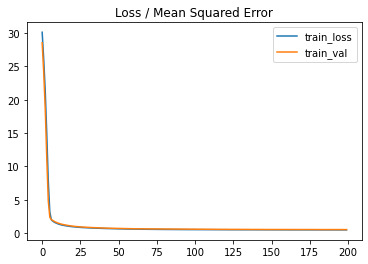

In [31]:
from matplotlib import pyplot
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='train_val')
pyplot.legend()
pyplot.show()

In [32]:
y_pred = model.predict(X_test)

In [36]:
y_pred.round()

array([[6.],
       [6.],
       [5.],
       ...,
       [6.],
       [6.],
       [6.]], dtype=float32)

In [ ]:
y_test

In [ ]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [ ]:
explained_variance_score(y_test,y_pred.round())

In [ ]:
mean_squared_error(y_test,y_pred.round())

In [ ]:
r2_score(y_test,y_pred.round())

In [ ]:
df_score_nn =  pd.DataFrame()

In [ ]:
df_score_nn['error'] = ('mse', 'r2') 

In [ ]:
df_score_nn['Full_NN'] = (0.57,0.28) 
df_score_nn['NN_redwine'] = (0.60,0.13) 
df_score_nn['NN_whitewine'] = (0.75,0.09) 

In [ ]:
df_score_nn

In [ ]:
model.save("model.h5")